In [1]:
import sys
sys.path.append('../src/')

import SimpleITK as sitk
import os
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from data.dataset import DatasetHandler
from data.Empire10 import read_image, read_raw
from utils.visualization import *

/home/moritz/anaconda3/envs/Registration/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# constants
DATASET_PATH = '../data/raw/EMPIRE10/scans/'
DATA_OUT_s = '/home/moritz/Thesis/ImageRegistration/data/interim/EMPIRE10/scans/'
DATA_OUT_m = '/home/moritz/Thesis/ImageRegistration/data/interim/EMPIRE10/masks/'

Read image: /home/moritz/Thesis/ImageRegistration/data/interim/EMPIRE10/scans/27_Fixed.nii


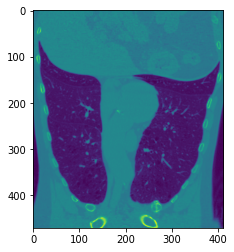

In [12]:
#plt.imshow(sitk.GetArrayViewFromImage(img))
im = DATA_OUT_s + "27_Fixed.nii"
nii = 'NiftiImageIO'
im_out = read_image(im, nii)
showITKImage(im_out)

In [4]:
filename = list(set([x.split('_')[0]
                     for x in os.listdir(DATASET_PATH)]))
print(filename)

['16', '01', '14', '18', '20', '06', '11', '24', '07', '21', '05', '04', '22', '12', '13', '08', '27', '26', '23', '19', '17', '25', '28', '30', '09', '03', '02', '10', '15', '29']


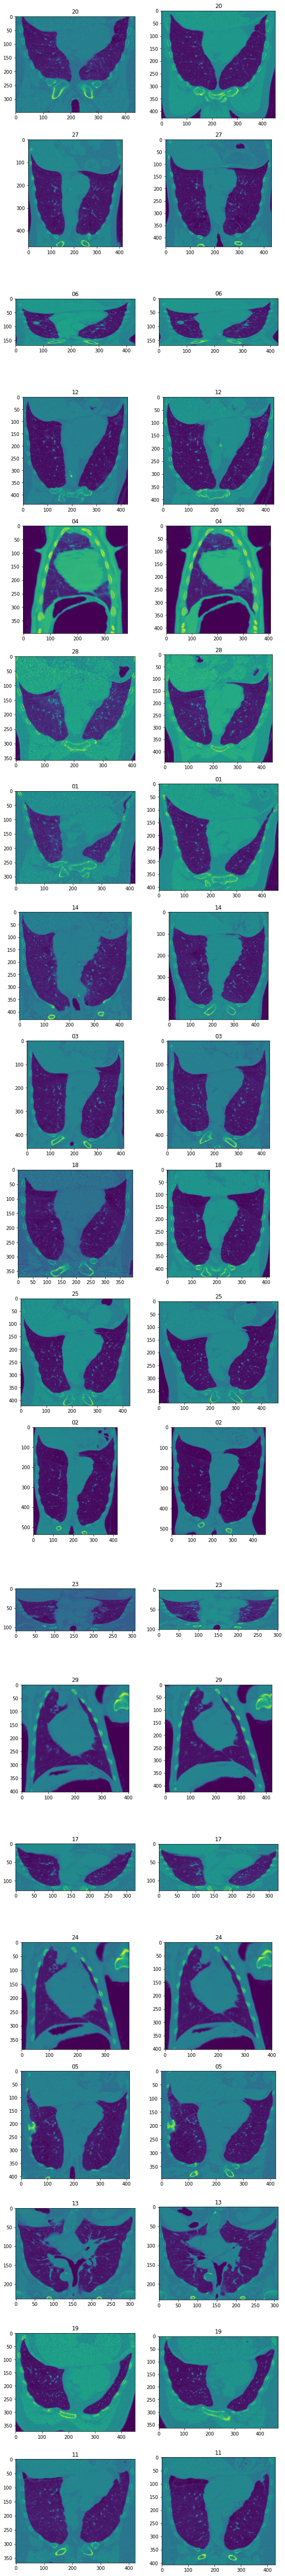

In [19]:
partition = {}
partition['train'], partition['validation'] = train_test_split(
    filename, test_size=0.33, random_state=42)

# Generators
training_set = DatasetHandler(partition['train'], 'interim/EMPIRE10/scans/')
print(training_set)

fig = plt.figure(figsize=(10, 100))
columns = 2
rows = 20
counter = 1
for i in range(1, rows +1):
    for n in range(2):
        img = training_set[i-1][n][:,100,:]
        fig.add_subplot(rows, columns, counter)
        plt.imshow(img)
        plt.title(training_set[i-1][2])
        counter += 1
plt.show()